# Task 1

---

## Web scraping and analysis


### Data Understanding 

The data was scraped from 

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Absolutely horrible airline....
1,✅ Trip Verified | Having experienced delays a...
2,✅ Trip Verified | Travelled to Heathrow to Kal...
3,Not Verified | This flight failed at every le...
4,Not Verified | Beware of British Airways and ...


In [4]:
df.to_csv("/Users/stella/Downloads/BritishAirways/BA/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,✅ Trip Verified | Absolutely horrible airline....
1,✅ Trip Verified | Having experienced delays a...
2,✅ Trip Verified | Travelled to Heathrow to Kal...
3,Not Verified | This flight failed at every le...
4,Not Verified | Beware of British Airways and ...
...,...
3495,LGW to AMS. Easy check-in at Gatwick with the ...
3496,I really do not have the energy to write very ...
3497,Flew in Club World for the first time on the n...
3498,LHR-ATH-ATH June 2014. Both flights 1.5 hours ...


In [6]:
# Inspect index 0

df['reviews'].get(0)

'✅ Trip Verified | Absolutely horrible airline. Communication is terrible. Last minute delays, cancellations, seat changes with no communication. App and website user experience is years behind other airlines. Seats are cramped and uncomfortable. Overpriced. Would not fly again.'

#### <b> Clean the dataset </b>

In [7]:
# import the NLTK libraries, used for semantic analysis purposes
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

In [9]:
import re
import nltk

In [10]:
reviews_data = df.reviews.str.strip("✅ Trip Verified |")
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [11]:
# add the corpus to the original dataframe

df['corpus'] = corpus
df

,reviews,corpus
0,✅ Trip Verified | Absolutely horrible airline....,absolutely horrible airline communication terr...
1,✅ Trip Verified | Having experienced delays a...,experienced delay cancellation departing usa e...
2,✅ Trip Verified | Travelled to Heathrow to Kal...,avelled heathrow kalamata return journey day l...
3,Not Verified | This flight failed at every le...,verified flight failed every level delayed arr...
4,Not Verified | Beware of British Airways and ...,verified beware british airway marketing make ...
...,...,...
3495,LGW to AMS. Easy check-in at Gatwick with the ...,lgw am easy check gatwick pod check print boar...
3496,I really do not have the energy to write very ...,really energy write detail bad recent flight v...
3497,Flew in Club World for the first time on the n...,flew club world first time new ba big disappoi...
3498,LHR-ATH-ATH June 2014. Both flights 1.5 hours ...,lhr ath ath june flight hour late always seems...


In [12]:
#Removing unwanted text(first text preprocessing)
df.replace(re.compile(r'\s*✅ Trip Verified \|\s*'), '', inplace=True)

df.head(8)

,reviews,corpus
0,Absolutely horrible airline. Communication is ...,absolutely horrible airline communication terr...
1,Having experienced delays and cancellations de...,experienced delay cancellation departing usa e...
2,Travelled to Heathrow to Kalamata and return j...,avelled heathrow kalamata return journey day l...
3,Not Verified | This flight failed at every le...,verified flight failed every level delayed arr...
4,Not Verified | Beware of British Airways and ...,verified beware british airway marketing make ...
5,I flew from Cairo to Heathrow on what they cal...,flew cairo heathrow call euro club class cramp...
6,"Not Verified | I flew with numerous airlines, ...",verified flew numerous airline gotta admit bri...
7,We were traveling as a family (5 people). Beca...,traveling family people accident airport arriv...


In [13]:
# Cleaned data 

df.to_csv("data/BA_reviews_cleaned.csv")

## <b> EDA </b>

In [32]:
# import the necessary libraries 

#import relevant libraries
from nltk.sentiment import vader
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px

In [15]:
df.head()

,reviews,corpus
0,Absolutely horrible airline. Communication is ...,absolutely horrible airline communication terr...
1,Having experienced delays and cancellations de...,experienced delay cancellation departing usa e...
2,Travelled to Heathrow to Kalamata and return j...,avelled heathrow kalamata return journey day l...
3,Not Verified | This flight failed at every le...,verified flight failed every level delayed arr...
4,Not Verified | Beware of British Airways and ...,verified beware british airway marketing make ...


In [16]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
df['SENTIMENT'] = df['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
df

,reviews,corpus,SENTIMENT
0,Absolutely horrible airline. Communication is ...,absolutely horrible airline communication terr...,-0.8932
1,Having experienced delays and cancellations de...,experienced delay cancellation departing usa e...,0.0516
2,Travelled to Heathrow to Kalamata and return j...,avelled heathrow kalamata return journey day l...,0.9032
3,Not Verified | This flight failed at every le...,verified flight failed every level delayed arr...,0.8820
4,Not Verified | Beware of British Airways and ...,verified beware british airway marketing make ...,-0.5519
...,...,...,...
3495,LGW to AMS. Easy check-in at Gatwick with the ...,lgw am easy check gatwick pod check print boar...,0.8100
3496,I really do not have the energy to write very ...,really energy write detail bad recent flight v...,-0.8880
3497,Flew in Club World for the first time on the n...,flew club world first time new ba big disappoi...,-0.9001
3498,LHR-ATH-ATH June 2014. Both flights 1.5 hours ...,lhr ath ath june flight hour late always seems...,-0.3400


In [17]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
df['SENTIMENT_TYPE'] = df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
df #inspect the dataframe

,reviews,corpus,SENTIMENT,SENTIMENT_TYPE
0,Absolutely horrible airline. Communication is ...,absolutely horrible airline communication terr...,-0.8932,negative
1,Having experienced delays and cancellations de...,experienced delay cancellation departing usa e...,0.0516,positive
2,Travelled to Heathrow to Kalamata and return j...,avelled heathrow kalamata return journey day l...,0.9032,positive
3,Not Verified | This flight failed at every le...,verified flight failed every level delayed arr...,0.8820,positive
4,Not Verified | Beware of British Airways and ...,verified beware british airway marketing make ...,-0.5519,negative
...,...,...,...,...
3495,LGW to AMS. Easy check-in at Gatwick with the ...,lgw am easy check gatwick pod check print boar...,0.8100,positive
3496,I really do not have the energy to write very ...,really energy write detail bad recent flight v...,-0.8880,negative
3497,Flew in Club World for the first time on the n...,flew club world first time new ba big disappoi...,-0.9001,negative
3498,LHR-ATH-ATH June 2014. Both flights 1.5 hours ...,lhr ath ath june flight hour late always seems...,-0.3400,negative


In [20]:
# calculate the percentage of each type of sentiment score
sent_type_percentages = df['SENTIMENT_TYPE'].value_counts(normalize=True)
sent_type_percentages

positive    0.590000
negative    0.407429
neutral     0.002571
Name: SENTIMENT_TYPE, dtype: float64

/var/folders/y4/pmym6p_d39x52p2813gxh2m40000gn/T/ipykernel_15649/2320097169.py:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(


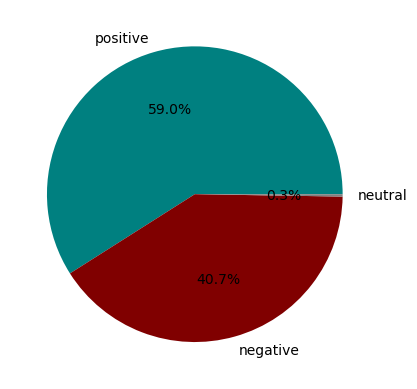

In [21]:
# Plot the sentiment percentages 
import matplotlib.pyplot as plt 
import seaborn as sns 

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sent_type_percentages,
    labels=sent_type_percentages.index, 
    colors=['teal', 'maroon', 'grey'], 
    autopct='%1.1f%%'
    )

plt.show()

Out of the 3500 reviews collected we can note the following:

1. 59 % had positive sentiments expressed towards British Airways 

2. 41 % had negative sentiments towards the company.

3. Only 0.3 % had a neutral sentiment expressed 


It is therefore of our importance to understand why the 41% expressed negative sentiments towards British Airways.


In [23]:
# Save the new data into a csv file 

df.to_csv("data/sentiment_analysis_data.csv")

In [24]:
# make a frequency chart that will tell us the key topics 

reviews = df['corpus']

# Convert the reviews into a list of words 

words = []
for review in reviews:
    words.extend(review.split())
    

# Filter out the remaining stopwords


stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]


In [30]:
# Get the top 15 most used words 
word_counts = Counter(key_words)
top_15_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_15_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]


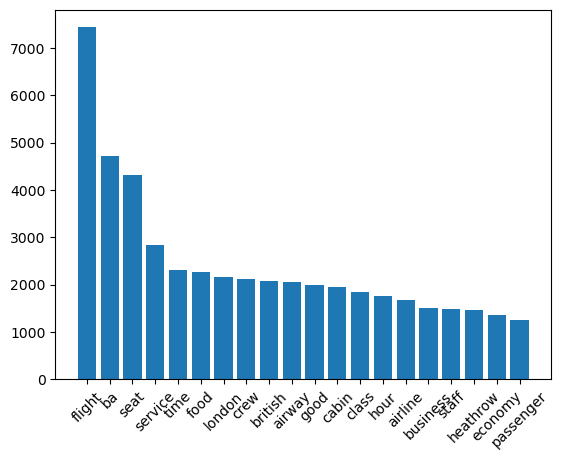

In [31]:
# Get the labels and values for the histogram
labels, values = zip(*top_15_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=45)

#Display the plot
plt.show()


## Key topics 

<b> interpretation here </b>

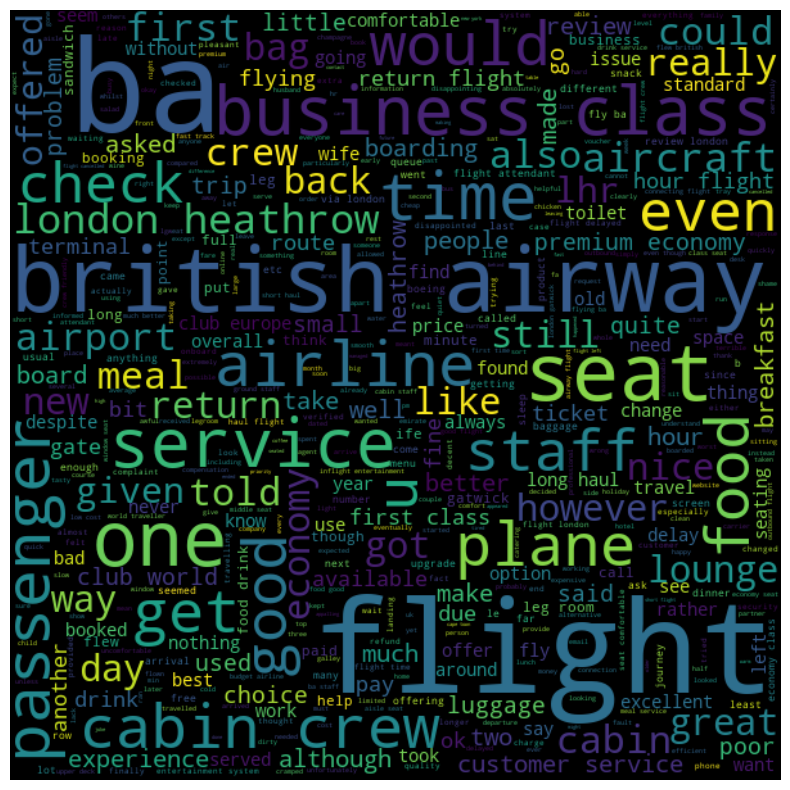

In [34]:
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()